# Titanic Assignment

## 1. Introduction

<img src= https://cdn.pixabay.com/photo/2022/01/27/17/51/titanic-6972725_960_720.jpg >

Titanic (Royal Mail Ship Titanic), was a British luxury passenger liner that sank on the 15th of April, 1912, during its voyage to New York City from Southampton, England. This led to the death of about 1,500 passengers and is seen as one of the most tragic incidents in history. 

In this project, we gathered insight about this catastrophe through the exploration of the [Titanic extended dataset (Kaggle + Wikipedia)](https://www.kaggle.com/datasets/pavlofesenko/titanic-extended) on Kaggle.

We were able to find answers to questions regarding 

1. How affluence affected survivability.
2. Total survivals per age group.
3. Did the bond of larger families influence survivability.
4. Which states in the United States were passengers heading to, as well as total survival per state.
5. The country of origins of these passengers and the total survival per home country.
6. What were the most important variables in predicting a passenger's survival

### 1.1 Importing required libraries

In [622]:
# !pip install pandas
# !pip install plotly
# !pip install geopy
# !pip install numpy
# !pip install folium
# !pip install sklearn
# !pip install seaborn
# !pip install miceforest
# !pip install matplotlib

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from geopy.geocoders import Nominatim
from matplotlib import pyplot as plt 
import miceforest as mf
import seaborn as sns
import pandas as pd
import numpy as np
import folium

In [469]:
# Enable the inline plotting with matplotlib
%matplotlib inline

## 2. Data Importation and Structure


There are 1309 observations and 21 variables in our dataset. These comprise a mixture of integers, floats and objects.

In [470]:
# Data importation
titanic_data = pd.read_csv("full.csv")
# Dimensions of dataset
titanic_data.shape

(1309, 21)

In [471]:
# head of the dataset
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,WikiId,Name_wiki,Age_wiki,Hometown,Boarded,Destination,Lifeboat,Body,Class
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,S,691.0,"Braund, Mr. Owen Harris",22.0,"Bridgerule, Devon, England",Southampton,"Qu'Appelle Valley, Saskatchewan, Canada",NaN,NaN,3.0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,C,90.0,"Cumings, Mrs. Florence Briggs (née Thayer)",35.0,"New York, New York, US",Cherbourg,"New York, New York, US",4,NaN,1.0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,S,865.0,"Heikkinen, Miss Laina",26.0,"Jyväskylä, Finland",Southampton,New York City,14?,NaN,3.0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,S,127.0,"Futrelle, Mrs. Lily May (née Peel)",35.0,"Scituate, Massachusetts, US",Southampton,"Scituate, Massachusetts, US",D,NaN,1.0
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,S,627.0,"Allen, Mr. William Henry",35.0,"Birmingham, West Midlands, England",Southampton,New York City,NaN,NaN,3.0


In [472]:
# describe data
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,WikiId,Age_wiki,Class
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,1304.000000,1302.000000,1304.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479,658.534509,29.415829,2.291411
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668,380.377373,13.758954,0.840852
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000,1.000000,0.170000,1.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800,326.750000,21.000000,1.750000
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,661.500000,28.000000,3.000000
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000,987.250000,37.750000,3.000000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200,1314.000000,74.000000,3.000000


In [473]:
# List of column names
titanic_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'WikiId', 'Name_wiki',
       'Age_wiki', 'Hometown', 'Boarded', 'Destination', 'Lifeboat', 'Body',
       'Class'],
      dtype='object')

In [474]:
# Alternative way to list column names
[col for col in titanic_data] # List comprehension method

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked',
 'WikiId',
 'Name_wiki',
 'Age_wiki',
 'Hometown',
 'Boarded',
 'Destination',
 'Lifeboat',
 'Body',
 'Class']

In [475]:
# variable types
titanic_data.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
WikiId         float64
Name_wiki       object
Age_wiki       float64
Hometown        object
Boarded         object
Destination     object
Lifeboat        object
Body            object
Class          float64
dtype: object

In [476]:
# Looking at data information
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
 12  WikiId       1304 non-null   float64
 13  Name_wiki    1304 non-null   object 
 14  Age_wiki     1302 non-null   float64
 15  Hometown     1304 non-null   object 
 16  Boarded      1304 non-null   object 
 17  Destination  1304 non-null   object 
 18  Lifeboat     502 non-null    object 
 19  Body  

## 3. Data Preprocessing and Cleaning

### 3.1 Handling Missing Data

Some variables in the dataset contain missing values. Most notable are Cabin, Lifeboat and Body since they have more than 50% missing data points. As a result they were removed due to the high amount of information lost. 

In [477]:
# Percentage missing data points per variable
titanic_data.isna().mean()*100

PassengerId     0.000000
Survived       31.932773
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.091673
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.076394
Cabin          77.463713
Embarked        0.152788
WikiId          0.381971
Name_wiki       0.381971
Age_wiki        0.534759
Hometown        0.381971
Boarded         0.381971
Destination     0.381971
Lifeboat       61.650115
Body           90.068755
Class           0.381971
dtype: float64

In [478]:
# Alternative to find percentage of missing values per variable
def percent_nan_func(df):
    percent_missing_list = [] # Create empty list for percentage of missing values
    col_name_list = [] # Create empty list for column names
    for col in df:
        nan_list = [item for item in df[col] if str(item) == 'nan'] # produce nan values for each column 
        full_list = [item for item in df[col]] # produce all values for each column
        Percent_missing_value = len(nan_list)/len(full_list) * 100 # Find percentage of nan values in each column by dividing with the total values in a column * 100
        percent_missing_list.append(round(Percent_missing_value,2)) # append percentage of missing values to empty percent_missing_list. Round to 2 decimal places
        col_name_list.append(col) # append column names to empty col_name_list
    
    return(list(zip(col_name_list,percent_missing_list))) # Combine both col_name_list and percent_missing_list

percent_nan_func(titanic_data) # Apply function to dataset

[('PassengerId', 0.0),
 ('Survived', 31.93),
 ('Pclass', 0.0),
 ('Name', 0.0),
 ('Sex', 0.0),
 ('Age', 20.09),
 ('SibSp', 0.0),
 ('Parch', 0.0),
 ('Ticket', 0.0),
 ('Fare', 0.08),
 ('Cabin', 77.46),
 ('Embarked', 0.15),
 ('WikiId', 0.38),
 ('Name_wiki', 0.38),
 ('Age_wiki', 0.53),
 ('Hometown', 0.38),
 ('Boarded', 0.38),
 ('Destination', 0.38),
 ('Lifeboat', 61.65),
 ('Body', 90.07),
 ('Class', 0.38)]

<AxesSubplot:>

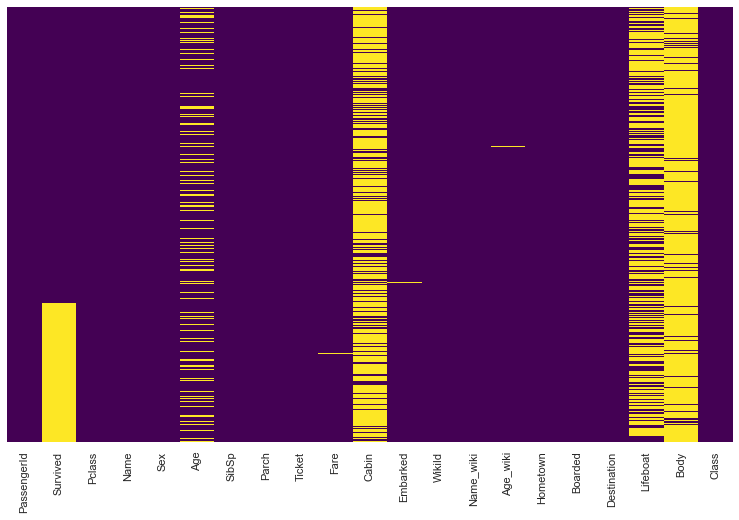

In [479]:
# Visualisation of missing data points per variable
plt.figure(figsize=(13,8)) # Set figure size
sns.heatmap(titanic_data.isnull(), # Return a boolean same-sized object indicating if the values are NA
            yticklabels=False,  # yticklabels=False disables y axis values 
            cbar=False, cmap="viridis") # cbar = False disables the colorbar, cmap="viridis" specifies the colour viridis

In [480]:
# Remove variables with more than 50% missing datapoints.

titanic_data.drop(["Cabin","Lifeboat","Body"],
                    axis=1, # axis = 1 implies that columns are to be selected
                    inplace=True) # inplace lets changes occur in the original dataset

The Age, Name_wiki, Class and Boarded were duplicated variables that possessed some missing values. The Age_wiki, Name, Pclass and Embarked possessed  fewer missing data points. As such the former variables were dropped. The WikiId variable did not contain information significant to our analysis and was also removed.

In [481]:
# Removing duplicated columns and WikiId as it is unnecessary to our analysis
titanic_data.drop(["Age","Name_wiki","WikiId","Class","Boarded"], 
                    axis=1,inplace =True)


In [482]:
# Change Age_wiki to Age
titanic_data.rename(columns = {"Age_wiki": "Age"}, inplace = True)

The Embarked, Destination, Hometown, Fare and Age variables all have missing data points less than 0.55 % of the observations (10 rows). Since this is insignificant, we removed these missing data points from the dataset.

In [483]:
# 1309 rows
titanic_data.shape

(1309, 13)

In [484]:
cols_with_na = ["Embarked","Destination","Hometown","Fare","Age"]
titanic_data.dropna(subset = cols_with_na, inplace=True)
titanic_data.reset_index(inplace=True,drop=True) # Reset index and drop old index

In [485]:
# 1299 rows. loss of 10 rows
titanic_data.shape

(1299, 13)

In [486]:
percent_nan_func(titanic_data)

[('PassengerId', 0.0),
 ('Survived', 31.87),
 ('Pclass', 0.0),
 ('Name', 0.0),
 ('Sex', 0.0),
 ('SibSp', 0.0),
 ('Parch', 0.0),
 ('Ticket', 0.0),
 ('Fare', 0.0),
 ('Embarked', 0.0),
 ('Age', 0.0),
 ('Hometown', 0.0),
 ('Destination', 0.0)]

### 3.2 Imputation of dependent variable (Survived)

#### 3.2.1 Distribution of Survived variable

From our data with missings values, we see that passengers who died (0) constitute about 61.7% of the data, whiles passengers who survived (1) constitute about 38.3% of the data. Any imputation method applied should produce similar distributions, to replicate the true data as much as possible.

0.0    61.694915
1.0    38.305085
Name: Survived, dtype: float64

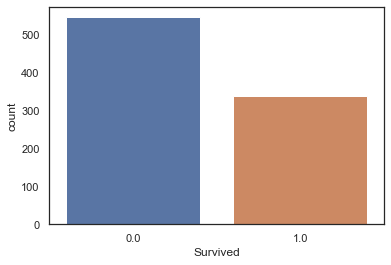

In [487]:
# Distribution of Survived variable
sns.countplot(x="Survived", data = titanic_data)
# Proportion of Survival status
titanic_data.Survived.value_counts(normalize = True) * 100 #  normalize = True returns the relative frequency by dividing all values by the sum of values.

#### 3.2.2 Imputating Survived variable with mode and median

The mean and median for the Survived variable is 0. Imputing this results in the deceased passengers taking about 74% of the data, whiles passengers who survived occupied approximately 26% of the data. These results fail to represent the distribution in the original variable.

In [488]:
titanic_data_test = titanic_data.copy(deep=True) # copy dataframe

In [489]:
survived_mode = titanic_data_test["Survived"].mode()[0]
survived_median = titanic_data_test["Survived"].median()
print(" The mode for the survived variable is: ", survived_mode, 
        "\n The median for the survived variable is also: ", survived_median,
        "\n The mode and median both indiate 0 meaning non-survival" )

 The mode for the survived variable is:  0.0 
 The median for the survived variable is also:  0.0 
 The mode and median both indiate 0 meaning non-survival


0.0    73.903002
1.0    26.096998
Name: Survived, dtype: float64

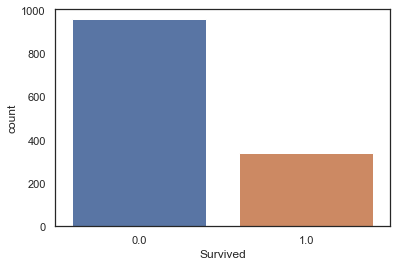

In [490]:
# Distribution after mode imputation
survived_mode = titanic_data_test["Survived"].mode()[0] # Selecting mode 
titanic_data_test["Survived"].fillna(survived_mode, inplace = True) # fill missing data with mode
sns.countplot(x="Survived", data = titanic_data_test)

# Proportion of Survival status
titanic_data_test.Survived.value_counts(normalize = True) * 100 # normalize = True returns the relative frequency by dividing all values by the sum of values.


#### 3.2.3 Imputating Survived variable with Multiple Imputation by Chained Equations (MICE)

To improve our imputation , we decided to apply Multiple Imputation by Chained Equations (MICE). MICE uses a divide-and-conquer technique to impute missing values in a data set's variables, concentrating on one variable at a time. MICE employs all of the other variables in the data set (or a sensible subset of these variables) to predict missingness in that variable. The prediction is made using a regression model, the kind of regression however is based on the variable under consideration.

To commence with MICE imputation, only variables that can be used for regression are selected. Namely numerical and categorical. These came down to Survived, Pclass, Sex, SibSp, Parch, Fare, Embarked and Age.

In [491]:
# selecting rows for mice
cols_name_mice = ["Survived", "Pclass", "Sex", "SibSp",
             "Parch", "Fare", "Embarked", "Age"]
df_for_mice = titanic_data[cols_name_mice]
df_for_mice 

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,Age
0,0.0,3,male,1,0,7.2500,S,22.0
1,1.0,1,female,1,0,71.2833,C,35.0
2,1.0,3,female,0,0,7.9250,S,26.0
3,1.0,1,female,1,0,53.1000,S,35.0
4,0.0,3,male,0,0,8.0500,S,35.0
...,...,...,...,...,...,...,...,...
1294,NaN,3,male,0,0,8.0500,S,23.0
1295,NaN,1,female,0,0,108.9000,C,39.0
1296,NaN,3,male,0,0,7.2500,S,43.0
1297,NaN,3,male,0,0,8.0500,S,34.0


In [492]:
# Converting categorical variables to right data type
cols_to_categ = ["Survived","Pclass","Sex","Embarked"]
cols_to_categ_df = df_for_mice[cols_to_categ].astype("category")
df_for_mice.drop(cols_to_categ, axis=1, inplace=True)
df_for_mice = pd.concat([df_for_mice, cols_to_categ_df], axis=1)


C:\Users\s4113984\AppData\Local\Temp\ipykernel_15616\3640650149.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_for_mice.drop(cols_to_categ, axis=1, inplace=True)


In [493]:
# Create kernels. 
np.random.seed(76)
kernel = mf.ImputationKernel( # create a MultipleImputedKernel and perform mice for a few iterations:
  data= df_for_mice ,
  save_all_iterations= True,
  random_state=76 # set random state for repeatability
)

# Run the MICE algorithm for 2 iterations on the dataset
kernel.mice(2,verbose=True)

Dataset 0
1  | Survived
2  | Survived
Dataset 1
1  | Survived
2  | Survived
Dataset 2
1  | Survived
2  | Survived
Dataset 3
1  | Survived
2  | Survived
Dataset 4
1  | Survived
2  | Survived


In [494]:
# Make a multiple imputed dataset with our new data
imputed_data = kernel.impute_new_data(df_for_mice)
# Return a completed dataset
clean_df = imputed_data.complete_data(0)

In [495]:
clean_df

,SibSp,Parch,Fare,Age,Survived,Pclass,Sex,Embarked
0,1,0,7.2500,22.0,0.0,3,male,S
1,1,0,71.2833,35.0,1.0,1,female,C
2,0,0,7.9250,26.0,1.0,3,female,S
3,1,0,53.1000,35.0,1.0,1,female,S
4,0,0,8.0500,35.0,0.0,3,male,S
...,...,...,...,...,...,...,...,...
1294,0,0,8.0500,23.0,1.0,3,male,S
1295,0,0,108.9000,39.0,0.0,1,female,C
1296,0,0,7.2500,43.0,0.0,3,male,S
1297,0,0,8.0500,34.0,0.0,3,male,S


Our imputed Survived variable now has a distribution similar to the original data. The passengers who died (0) constitute about 61% of the data, whiles passengers who survived (1) constitute about 39% of the data. 

0.0    0.60893
1.0    0.39107
Name: Survived, dtype: float64

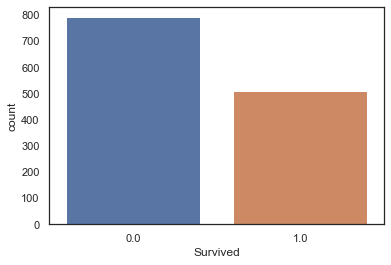

In [496]:
sns.countplot(x="Survived", data = clean_df)

# Proportion of Survival status
clean_df.Survived.value_counts(normalize = True)

In [497]:
titanic_data["Survived"] = clean_df["Survived"].astype("int") # Overwrite Survived variable with imputed version and set to integer

In [498]:
# Data set is now clean
percent_nan_func(titanic_data)

[('PassengerId', 0.0),
 ('Survived', 0.0),
 ('Pclass', 0.0),
 ('Name', 0.0),
 ('Sex', 0.0),
 ('SibSp', 0.0),
 ('Parch', 0.0),
 ('Ticket', 0.0),
 ('Fare', 0.0),
 ('Embarked', 0.0),
 ('Age', 0.0),
 ('Hometown', 0.0),
 ('Destination', 0.0)]

### 3.3 Feature Engineering

#### 3.3.1 Died variable


To permit some analysis of the deaths which occurred on the titanic. A died variable was created being the inverse of the survived variable.

In [499]:
# Creating Died variable
died= np.where(titanic_data["Survived"]== 0,1,0 ) # where survived = to 0 then died = 1 and vice versa
died[:10] # First 10 elements

array([1, 0, 0, 0, 1, 1, 1, 1, 0, 0])

In [500]:
# Alternative died variable 
died_alt = [1 if i == 0 else 0 for i in titanic_data["Survived"]] # list containing inverse of survived varibale 
died_alt[:10] # First 10 elements

[1, 0, 0, 0, 1, 1, 1, 1, 0, 0]

In [501]:
# check if the same
list(died) == list(died_alt)

True

In [502]:
titanic_data["Died"]= died_alt # Create died variable in dataframe

#### 3.3.2 Family size variable

The family size variable was also created by summing up a passenger with their siblings/spouses and parents/children aboard the Titanic

In [503]:
# Create Family size variable
fam_size = titanic_data["SibSp"] + titanic_data["Parch"] + 1 
titanic_data["Family_size"] = fam_size


#### 3.3.3 Destination Country

Another useful feature was the countries the passengers were travelling to. This was usually found at the tail end of the values in the destination variable.

In [504]:
titanic_data.Destination.head(10) # Top 10 obervations in Destination variable

0    Qu'Appelle Valley, Saskatchewan, Canada
1                     New York, New York, US
2                              New York City
3                Scituate, Massachusetts, US
4                              New York City
5                              New York City
6              Dorchester, Massachusetts, US
7                      Chicago, Illinois, US
8                  St. Charles, Illinois, US
9                        Cleveland, Ohio, US
Name: Destination, dtype: object

In [505]:
destination_country_list = [] # Emply list for destination country
for i in titanic_data["Destination"]:
    country_split = i.split(",") # Split by ","
    split_len = len(country_split) # Length of the split
    country_name = country_split[split_len - 1] # Select element at the end of the split
    destination_country_list.append(country_name) # Append them to the destination country list

In [506]:
destination_country_df = pd.DataFrame(destination_country_list, 
                                    columns=["destination_country"]) # Convet to dataframe

# Strip white spaces at the head and tail of each country
destination_strip = destination_country_df["destination_country"].str.strip() 

destination_country_df["destination_country"] = destination_strip 


In [507]:
destination_country_df["destination_country"].unique() # Unique elements

array(['Canada', 'US', 'New York City', 'Mexico', 'Haiti', 'Uruguay',
       'Japan', 'DC US', 'Massachusetts', 'Cuba', 'Connecticut US',
       'Peru', 'Brazil', 'Wisconsin'], dtype=object)

In [508]:
# Alternative way to show unique elements
def get_unique_elements(elements): # Function to get unique elements in a list
    list_of_unique_elements = [] # Empty list
    set_elements = set(elements) # Set of elements in the list

    for element in set_elements: # Loop through set of elemets
        list_of_unique_elements.append(element) # Append elements in the empty list

    return list_of_unique_elements # Return unique elements
    
get_unique_elements(destination_country_df["destination_country"])

['US',
 'New York City',
 'Brazil',
 'DC US',
 'Canada',
 'Massachusetts',
 'Peru',
 'Japan',
 'Mexico',
 'Cuba',
 'Uruguay',
 'Connecticut US',
 'Haiti',
 'Wisconsin']

USA cities and states are not countries. We will rename the cities, and states to represent the United States. The abbreviation "US" will also be changed to United States.

In [509]:
wrong_countries_us = ['New York City','Connecticut US','DC US','Massachusetts', "Wisconsin", 'US'] # Erroneous countries

for i in range(len(destination_country_df["destination_country"])):
    if destination_country_df["destination_country"][i] in wrong_countries_us: # If list contain wrong country
        destination_country_df["destination_country"][i] = "United States" # Replace with United States

In [510]:
# No more erroneous countires
destination_country_df["destination_country"].unique()

array(['Canada', 'United States', 'Mexico', 'Haiti', 'Uruguay', 'Japan',
       'Cuba', 'Peru', 'Brazil'], dtype=object)

In [511]:
titanic_data["Destination_country"] = destination_country_df["destination_country"] # overwrite in dataset

#### 3.3.4 Home Country

Home country was another important variable, indicating the country of birth of the passanger. We were able to extract it form the home town variables following the same procedures for extracting the destination country variable.

In [512]:
home_country_list = [] # Empty list for home country
for i in titanic_data["Hometown"]:
    country_split = i.split(",") # Split by ","
    split_len = len(country_split) # Lenght of Split
    country_name = country_split[split_len-1] # Select element at the end of the split
    home_country_list.append(country_name) # Append to home country empty list

In [513]:
home_country_df = pd.DataFrame(home_country_list,
                                columns=["home_country"]) # Convet to dataframe

# Strip white spaces at the head and tail of each country
home_country_df["home_country"] = home_country_df["home_country"].str.strip() 

In [514]:
home_country_df["home_country"].unique() # Unique elements 

array(['England', 'US', 'Finland', 'Ireland', 'Sweden', 'Ottoman Empire',
       'UK[note 3]', 'Belgium', 'Lebanon', 'UK', 'Canada', 'Bulgaria',
       'Mexico', 'Channel Islands', 'France', 'Wales', 'Switzerland',
       'Turkey', 'Greece', 'China', 'Norway', 'Siam', 'Uruguay', 'Italy',
       'Russian Empire', 'Croatia', 'Bosnia', 'Syria',
       'Ottoman Empire[note 7]', 'Syria[81]', 'Portugal', 'Argentina',
       'Scotland', 'British India', 'Denmark', 'Japan', 'Ireland[note 1]',
       'Spain', 'Russia', 'Australia', 'Russian Empire[note 6]',
       'Germany', 'Poland', 'New York City', 'South Africa', 'Slovenia',
       'Unknown', 'UK[note 1]', 'Russia (Estonia?)', 'Egypt',
       'UK[note 4]', 'The Netherlands', 'Peru', 'North Somerset England',
       'Lithuania [76]', 'Siam[note 5]', 'Syria or Lebanon', 'Cuba',
       'Macedonia', 'German Empire[note 2]', 'Belarus',
       'British India[note 3]', 'Austria'], dtype=object)

In [515]:
len(home_country_df["home_country"].unique()) # Number of unique elements

63

In [516]:
# Alternative way to find length of elements 
counter = 0
for i in get_unique_elements(home_country_df["home_country"]):
    counter += 1
print(counter)

63


The variable has a lot of erroneous or outdated country names which were replaced with the right ones.

In [517]:
home_country_df["home_country"].replace({'Lithuania [76]':'Lithuania', 'US':'United States', 'UK[note 1]':'United Kingdom',
                                        'Russia (Estonia?)':'Russia', 'Russian Empire[note 6]':'Russia', 'UK[note 3]':'United Kingdom','Siam':'Thailand',
                                        'North Somerset England':'United Kingdom', 'Ireland[note 1]':'Ireland', 'Russian Empire':'Russia',
                                        'UK[note 4]':'United Kingdom', 'Ottoman Empire[note 7]':'Turkey', 'Syria[81]':'Syria', 'British India':"India",
                                        'England':'United Kingdom','UK':'United Kingdom','Channel Islands':'United Kingdom','Ottoman Empire':'Turkey',
                                        'Wales':'United Kingdom','Scotland':'United Kingdom','New York City':'United States','Siam[note 5]':'Thailand',
                                        'Syria or Lebanon':'Syria','German Empire[note 2]':'Germany','British India[note 3]':'India'}, inplace = True) # Rename erroneous countries

In [518]:
home_country_df["home_country"].unique() # unique elements # unique elements

array(['United Kingdom', 'United States', 'Finland', 'Ireland', 'Sweden',
       'Turkey', 'Belgium', 'Lebanon', 'Canada', 'Bulgaria', 'Mexico',
       'France', 'Switzerland', 'Greece', 'China', 'Norway', 'Thailand',
       'Uruguay', 'Italy', 'Russia', 'Croatia', 'Bosnia', 'Syria',
       'Portugal', 'Argentina', 'India', 'Denmark', 'Japan', 'Spain',
       'Australia', 'Germany', 'Poland', 'South Africa', 'Slovenia',
       'Unknown', 'Egypt', 'The Netherlands', 'Peru', 'Lithuania', 'Cuba',
       'Macedonia', 'Belarus', 'Austria'], dtype=object)

In [519]:
len(home_country_df["home_country"].unique()) # Number of unique elements

43

In [520]:
titanic_data["Home_country"] = home_country_df["home_country"] # overwrite with original in dataset

#### 3.3.5 Age group variable

The age group column was created to categorize the numerical age variable. A total of 8 groups were created, with an interval of 10 years, starting from 0 to 80.

In [521]:
# Defining the age bins
bins = [0,10,20,30,40,50,60,70,80] # Define bins
age_groups = pd.cut(titanic_data["Age"],bins) # Using panadas cut method to create age groups
age_groups

0       (20, 30]
1       (30, 40]
2       (20, 30]
3       (30, 40]
4       (30, 40]
          ...   
1294    (20, 30]
1295    (30, 40]
1296    (40, 50]
1297    (30, 40]
1298     (0, 10]
Name: Age, Length: 1299, dtype: category
Categories (8, interval[int64, right]): [(0, 10] < (10, 20] < (20, 30] < (30, 40] < (40, 50] < (50, 60] < (60, 70] < (70, 80]]

In [522]:
# Alternative age binning
def age_grouper_function(age): # Function to assign age to a particular age group
    if 0 <= age <= 10:
        return "[0,10]"
    elif  10 < age <= 20:
        return "[10,20]"
    elif  20 < age <= 30:
        return "[20,30]"
    elif  30 < age <= 40:
        return "[30,40]"
    elif  40 < age <= 50:
        return "[40,50]"
    elif  50 < age <= 60:
        return "[50,60]"
    elif  60 < age <= 70:
        return "[60,70]"
    elif  70 < age <= 80:
        return "[70,80]"
    
age_groups_alt = [age_grouper_function(age) for age in titanic_data["Age"]] # List comprehension with age_grouper_function
age_groups_alt[:4] # Show first 4 age groups

['[20,30]', '[30,40]', '[20,30]', '[30,40]']

In [523]:
titanic_data["Age_groups"] = age_groups_alt # overwrite with original in dataset
titanic_data["Age_groups"] = titanic_data["Age_groups"].astype("category") # covert to type category for later visualizations

## 4. Exploratory Data Analysis

### 4.1 Visualize the count of survivors for Age groups, Sex, Pclass, Siblings, Parents and Embarked.

#### 4.1.1 Age group

The age group with the highest count on the titanic ship was 20 to 30 years. This group showed the highest total survivals and deaths of about 145 and 290 respectively. This was followed by the 30 to 40 year group with total survivals and deaths of about 110 and 150 respectively. The group with the lowest count with the lowest total survivals and deaths were the 70 to 80 year group with about four deaths and no survivors.

#### 4.1.2 Sex

The idea of putting women and children first came to bear in the visualisation of the sexes. Even though the total count of males far exceeds that of females, females saw higher total survivals with a value of around 320 compared to the approximately 160 males who survived. Consequently, the total number of deaths for females and males is approximate 120 and 670 respectively.

#### 4.1.3 Passenger Class (Pclass)

From our Pclass visualization, we see that affluence offered a good degree of protection from death. Passengers in the 1st class had the highest survival numbers of about 180 and the lowest deaths of about 120. In the 2nd passenger class, about 154 passengers survived with about 120 passengers passing away. In the 3rd class, we witnessed the highest deaths of about 500 passengers with only 190 passengers surviving.

#### 4.1.4 Siblings / Spouses (SibSP)

In the fourth plot, we realise that individuals without any siblings or spouses had the highest count on the ship, with total deaths and survivors of about 560 and 300 respectively. Individuals with one sibling or spouse however seemed to survive more with death and survived numbers of 143 and 175 respectively.

#### 4.1.5 Parents / Children (Parch)

The fifth plot indicates the total number of survived and dead passengers according to parents and children. The highest number of people who passed away didn't have any parents or children, however approximately half of them survived. This turned out to be approximately 665 deaths and 339 survivors. Passengers with 4 to 9 parents and children were however underrepresented in the data, so barely had any total survivors and deaths.

In [524]:
titanic_data.groupby(["Parch","Survived"]).size()

Parch  Survived
0      0           649
       1           345
1      0            70
       1            99
2      0            56
       1            56
3      0             3
       1             5
4      0             5
       1             1
5      0             5
       1             1
6      0             2
9      0             1
       1             1
dtype: int64

#### 4.1.6 Embarked

The last plot shows the number of death and survival from where people embarked. The majority of people embarked from Southampton (S), these passangers had maximum deaths of around 580 and survivors of about 310. The least number of people embarked from Q (Queenstown) and surprisingly had more survivors of around 80 to deaths of about 60.

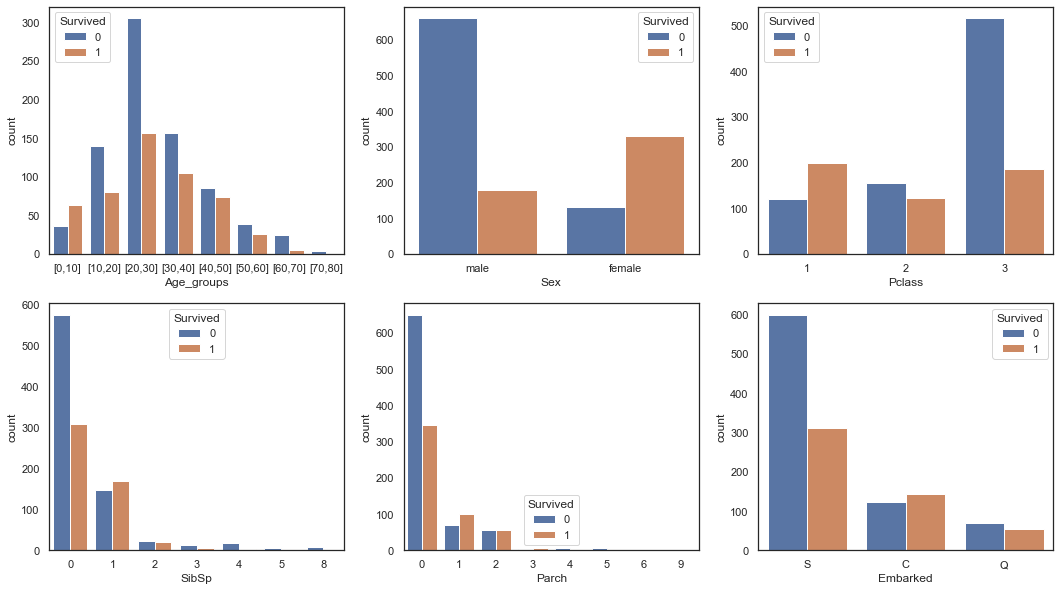

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

In [525]:
cols=["Age_groups","Sex","Pclass","SibSp","Parch","Embarked"] # selected columns to visualize
n_cols=3 # Number of columns in subplot
n_rows=2 # Number of rows in subplot
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 10)) # Plot subplot

for i in range(0, n_rows): 
    for j in range(0, n_cols):
        t = i * n_cols + j 
        sns.countplot(x= titanic_data[cols[t]], hue=titanic_data["Survived"], ax=axes[i, j])
        plt.figure(figsize=(10, 10)) # visualization figure size

plt.tight_layout()


### 4.2 Correlogram of variables

The Fare and Passenger Class (Pclass) variables had the strongest correlation, albeit negative, of 0.53. In second place were the Age and Pclass variable with a negative correlation of 0.42.

Text(0.5, 1.0, 'Correlation Matrix of Titanic Dataset')

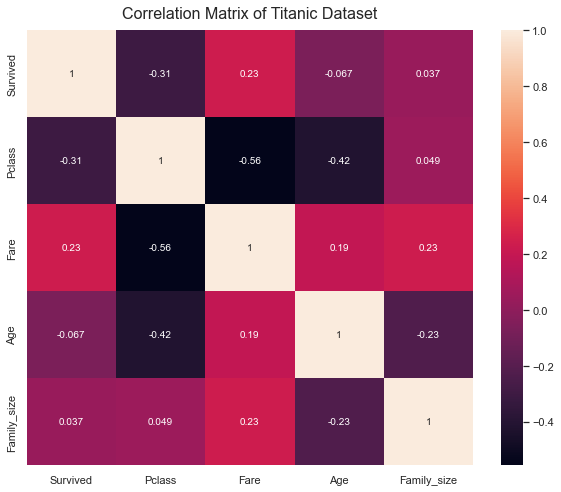

In [526]:
# Find correlation beween variables
new_df = titanic_data.drop(["SibSp","Parch","PassengerId","Died"], axis = 1)
corr_data = new_df.corr()
corr = new_df.corr()
plt.figure(figsize=(10,8))
heatmap = sns.heatmap(corr, annot=True)
heatmap.set_title("Correlation Matrix of Titanic Dataset", fontdict={"fontsize":16}, pad = 12)


### 4.3 Count of different family sizes on the titanic

Singles individuals with no families constituted a majority of the passengers on the titanic with a total count of 783. In the family size of two, we saw a sharp drop in counts to 233. The inverse relationship between family size and the count continued with the largest family size of eleven having a count of 11.

In [527]:
family_group_count = titanic_data.groupby(["Family_size"]).Family_size.agg(["count"]) # group by Family_size and aggregate count per each family size
family_group_count = family_group_count.reset_index() # Reset index to make the Family_size a variable instead of an index
family_group_count

,Family_size,count
0,1,783
1,2,233
2,3,158
3,4,43
4,5,22
5,6,25
6,7,16
7,8,8
8,11,11


In [528]:
# Alterative aggregate by count function
def agg_by_count(name_elements):
    element = [] # empty list for elements
    element_counter = [] # empty list for element_counter

    # Show unique elements funciton
    def get_unique_elements(elements): # Function to get unique elements in a list
        list_of_unique_elements = [] # Empty list
        set_elements = set(elements) # Set of elements in the list
        for element in set_elements: # Loop through set of elemets
            list_of_unique_elements.append(element) # Append elements in the empty list
        return list_of_unique_elements # Return unique elements

    unique_elements = get_unique_elements(name_elements) # Get unique elements

    for uni in unique_elements:
        element_list = [1 for element in name_elements if element == uni] # Produce 1 if looped element passed in argument is equal to looped unique element
        element_count = sum(element_list) # Sum of elements
        element.append(uni) # Append unique name to element list
        element_counter.append(element_count) # Append element_count to element_counter list

    return list(zip(element, element_counter)) # return zip of both element and element_counter list

agg_by_count(titanic_data["Family_size"])

[(1, 783),
 (2, 233),
 (3, 158),
 (4, 43),
 (5, 22),
 (6, 25),
 (7, 16),
 (8, 8),
 (11, 11)]

Text(0, 0.5, 'Count')

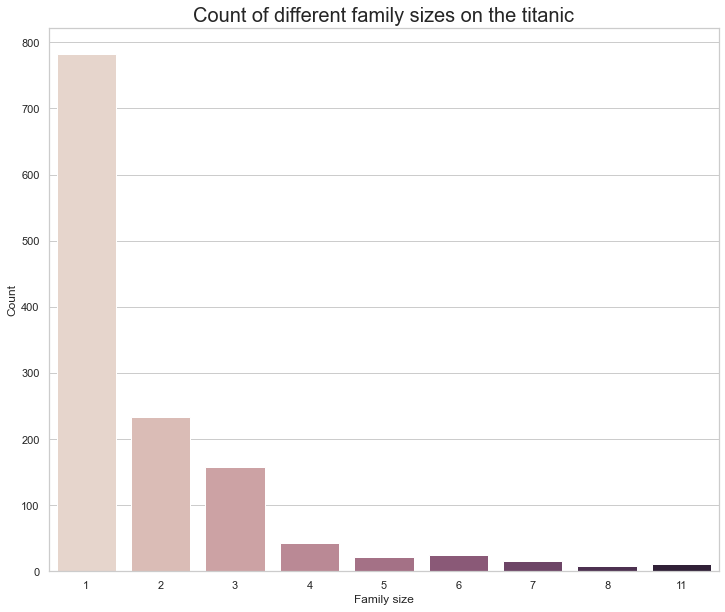

In [529]:
plt.figure(figsize=(12,10)) # Set size of plot to a width of 12 and a height of 10
sns.set_theme(style="whitegrid") # Set plot style to whitegrid
sns.barplot(x="Family_size", y="count", palette="ch:.1", data = family_group_count) # Plot family size on the x axis and count on the y axis
plt.title("Count of different family sizes on the titanic", fontsize = 20) # Plot title
plt.xlabel('Family size') # x axis title
plt.ylabel('Count') # y axis title

### 4.4 Count of survival status for each family size

The bond of larger families seems to have any effect on survivability, albeit within a range. Single passengers who represented the majority had the highest death and survival numbers of 549 and 234 respectively. Families of two, three and four however had more survivors relative to deaths. Families larger than four saw the opposite effect with survivors exceeding deaths. 

In [530]:
Family_surv = titanic_data.groupby(["Family_size", # Group by family size and survived variable and determine count.
                                    "Survived"]).size().reset_index(name="counts") # Make the index the count variable for visualization

Family_surv

,Family_size,Survived,counts
0,1,0,539
1,1,1,244
2,2,0,106
3,2,1,127
4,3,0,70
5,3,1,88
6,4,0,12
7,4,1,31
8,5,0,15
9,5,1,7


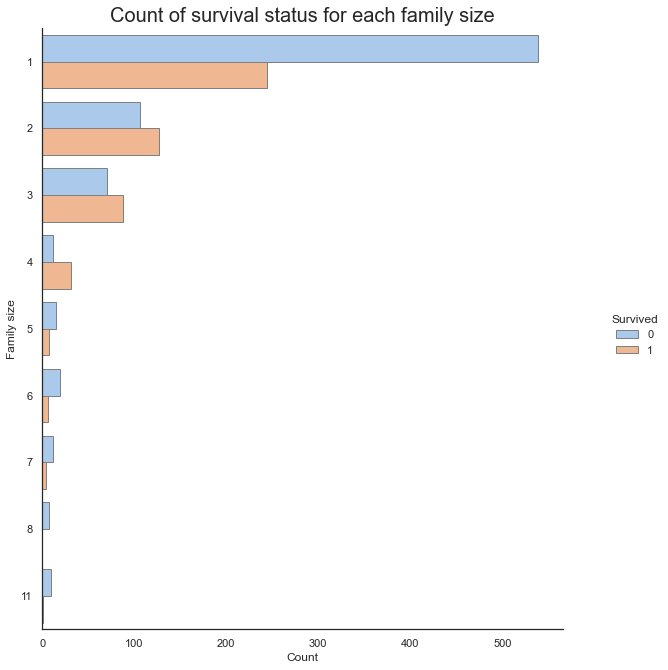

In [531]:
sns.set_style("white") # Set style to white
cat_plot = sns.catplot(y="Family_size", hue="Survived", # Set Family_size to the y-axis and hue to the survived variable
                        kind="count", palette="pastel", # Kind of plot is count and pallete defines the colour
                        edgecolor=".5",data=titanic_data) # Edgecolor defines the boldness of the edges of the catplot. Lower values give bolder colours
plt.title("Count of survival status for each family size", fontsize = 20) # Define title and fontsize
plt.xlabel('Count') # Label x axis
plt.ylabel('Family size') # Label y axis
cat_plot.fig.set_size_inches(10,10) # Set width to 10 and height to 10


### 4.5 Distribution of Age per Passanger Class

Average age decreases as we descend into lower passenger classes. This makes sense as people accrue more wealth as they age on average. The mean age, maximum and minimum values for the 1st Passenger class was about 39, 71 and 1 respectively. The mean age, maximum and minimum values for the 2nd Passenger class was about 30, 71 and 1 respectively.
The mean age, maximum and minimum values for the 3rd Passenger class was about 25, 74 and 0.2 respectively. 

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

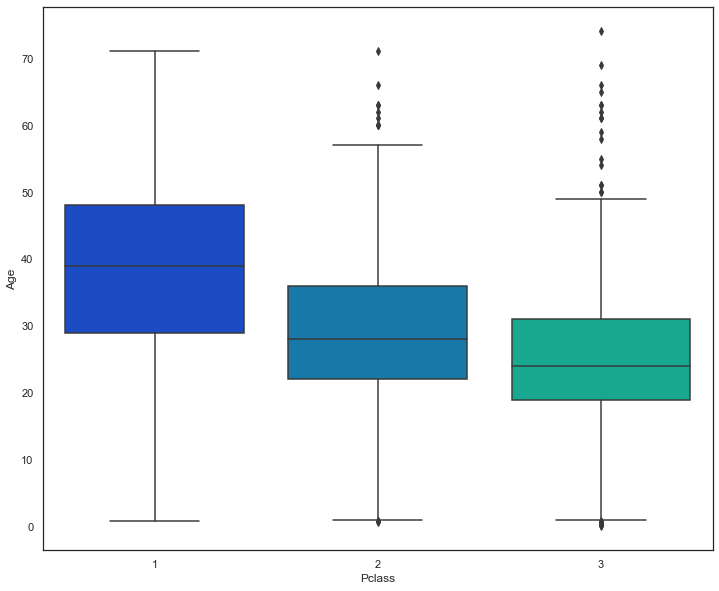

In [532]:
plt.figure(figsize=(12,10)) # Set figure size with width 12 and height 10
sns.boxplot(x="Pclass", y="Age", data=titanic_data, palette="winter") 

### 4.6 Distribution of fare prices per survival status

Once more we see the effects of affluence on survivability. Passengers who survived paid a higher average fare price of about $50 compared to those who died who paid an average fare price of about $22. The maximum fare price for passengers who survived was around $510 and that of those who died was $263.

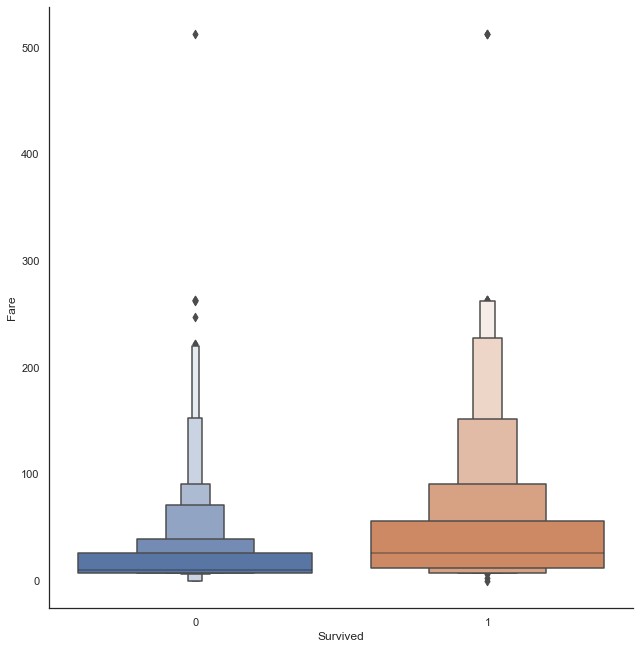

In [533]:
boxen_plot = sns.catplot(x="Survived", y="Fare", kind="boxen",
            data=titanic_data)

boxen_plot.fig.set_size_inches(10,10) # Set figure width to 10 and height to 10

### 4.7 Choropleth map of deaths per US state

We visualised a map that showed the total number of survivors per state in the United States.

In [534]:
dest_us_df = titanic_data[titanic_data['Destination_country']=="United States"] # Select passangers form the United States
dest_us_df.reset_index(inplace=True, drop=True) # Index not in order so we will reset the index and drop the old index
dest_us_df

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked,Age,Hometown,Destination,Died,Family_size,Destination_country,Home_country,Age_groups
0,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C,35.0,"New York, New York, US","New York, New York, US",0,2,United States,United States,"[30,40]"
1,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,S,26.0,"Jyväskylä, Finland",New York City,0,1,United States,Finland,"[20,30]"
2,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,S,35.0,"Scituate, Massachusetts, US","Scituate, Massachusetts, US",0,2,United States,United States,"[30,40]"
3,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,S,35.0,"Birmingham, West Midlands, England",New York City,1,1,United States,United Kingdom,"[30,40]"
4,6,0,3,"Moran, Mr. James",male,0,0,330877,8.4583,Q,22.0,"Cork, Ireland",New York City,1,1,United States,Ireland,"[20,30]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1152,1305,1,3,"Spector, Mr. Woolf",male,0,0,A.5. 3236,8.0500,S,23.0,"London, England",New York City,0,1,United States,United Kingdom,"[20,30]"
1153,1306,0,1,"Oliva y Ocana, Dona. Fermina",female,0,0,PC 17758,108.9000,C,39.0,"Madrid, Spain","New York, New York, US",1,1,United States,Spain,"[30,40]"
1154,1307,0,3,"Saether, Mr. Simon Sivertsen",male,0,0,SOTON/O.Q. 3101262,7.2500,S,43.0,"Skaun, Sør-Trøndelag, Norway",US,1,1,United States,Norway,"[40,50]"
1155,1308,0,3,"Ware, Mr. Frederick",male,0,0,359309,8.0500,S,34.0,"Greenwich, London, England",New York City,1,1,United States,United Kingdom,"[30,40]"


In [535]:
# Creating destination state variable for passagers form  United States

dest_state_list = [] # Empty dest_state_list
for i in dest_us_df["Destination"]:
    dest_state_split = i.split(",") # Split destination variable by ","
    split_len = len(dest_state_split) # Length of elements in split
    if split_len == 3:
        state_name = dest_state_split[split_len-2] # If length is 3 state is mostly the second element
    elif split_len == 2:
        state_name = dest_state_split[split_len-2]  # If length is 2 state is mostly the first element
    else:
        state_name = i
    dest_state_list.append(state_name) # Append state_name in dest_state_list

In [536]:
dest_state_df = pd.DataFrame(dest_state_list, columns=["destination_state"]) # Convet to dataframe
dest_state_df["destination_state"] = dest_state_df["destination_state"].str.strip() # Strip white spaces at the head and tail of each country

In [537]:
dest_state_df["destination_state"].unique() # Get unique elements

array(['New York', 'New York City', 'Massachusetts', 'Illinois', 'Ohio',
       'San Francisco', 'Los Angeles', 'South Dakota', 'Washington',
       'Indiana', 'Connecticut', 'DC', 'Rhode Island', 'Pennsylvania',
       'Florida', 'Minnesota', 'Utah', 'New Jersey', 'Wisconsin',
       'Delaware', 'Michigan', 'Georgia', 'North Dakota', 'Kansas',
       'Maine', 'Charlestown', 'Oregon', 'Idaho', 'Iowa', 'Colorado',
       'Virginia', 'California', 'New Mexico', 'Montana', 'Kentucky',
       'Vermont', 'Russell', 'Oklahoma', 'Nebraska', 'Wyoming',
       'Stoughton', 'Texas', 'Carneron', 'Missouri',
       'Brighton, Boston, Massachusetts, US', 'Arizona', 'New Hampshire',
       'Stamford', 'West Virginia', 'North Carolina', 'Milwaukee', 'US'],
      dtype=object)

In [538]:
# Replace erroneous states
dest_state_df["destination_state"].replace({"New York City":"New York","San Francisco":"California",
                                        "DC":"District of Columbia", "Charlestown":"Massachusetts",
                                        "Russell":"California","Stoughton":"Wisconsin",
                                        "Carneron":"Texas","Brighton, Boston, Massachusetts, US":"Massachusetts",
                                        "Stamford":"Connecticut", "Milwaukee":"Wisconsin"}, inplace = True) 

The destination with the label US will be removed later on as we can't determine which state in the United States he was heading to

In [539]:
dest_state_df["destination_state"].unique() # Get unique elements

array(['New York', 'Massachusetts', 'Illinois', 'Ohio', 'California',
       'Los Angeles', 'South Dakota', 'Washington', 'Indiana',
       'Connecticut', 'District of Columbia', 'Rhode Island',
       'Pennsylvania', 'Florida', 'Minnesota', 'Utah', 'New Jersey',
       'Wisconsin', 'Delaware', 'Michigan', 'Georgia', 'North Dakota',
       'Kansas', 'Maine', 'Oregon', 'Idaho', 'Iowa', 'Colorado',
       'Virginia', 'New Mexico', 'Montana', 'Kentucky', 'Vermont',
       'Oklahoma', 'Nebraska', 'Wyoming', 'Texas', 'Missouri', 'Arizona',
       'New Hampshire', 'West Virginia', 'North Carolina', 'US'],
      dtype=object)

In [540]:
# Concat destination_state variable in the dest_us_df dataframe
dest_us_df = pd.concat([dest_us_df, dest_state_df], axis=1)

In [541]:
# Remove state with label US as i cant determine that state the passanger belongs to
row_ind_drop = dest_us_df[dest_us_df["destination_state"] =="US"].index[0] # Row index of US in the destination_state variable
dest_us_df = dest_us_df.drop(dest_us_df.index[row_ind_drop]) # drop row based on index
dest_us_df.reset_index(inplace=True, drop=True) # reset index and drop old one since we have indexed out a row

In [542]:
# Sum of deaths per state
dest_state_died = dest_us_df.groupby(["destination_state"]).Died.agg(["sum"]).reset_index()
dest_state_died.sort_values("sum", ascending=False).head(10) # Top 10 states by total deaths


,destination_state,sum
25,New York,255
9,Illinois,69
31,Pennsylvania,54
17,Michigan,45
23,New Jersey,39
28,Ohio,27
16,Massachusetts,24
40,Wisconsin,19
18,Minnesota,19
3,Connecticut,18


In [543]:
# Alternative sum of deaths per state
# Aggregate by sum function 
def agg_by_sum(name_elements, value_elements):

    name_list = []
    unique_name_list = []
    value_list = []
    sum_list = []

    # Function to show unique elements
    def get_unique_elements(elements): # Function to get unique elements in a list
        list_of_unique_elements = [] # Empty list
        set_elements = set(elements) # Set of elements in the list
        for element in set_elements: # Loop through set of elemets
            list_of_unique_elements.append(element) # Append elements in the empty list
        return list_of_unique_elements # Return unique elements

    # Function to choose 2nd element in a list
    def take_second(item):
        return item[1]

    unique_names = get_unique_elements(name_elements) # Unique elements

    for names, values in zip(name_elements,value_elements): # loop through both name elements and values
        value_list.append(values) # Append values to value_list
        name_list.append(names) # Append name to name_list

    for uni in unique_names:
        indices = [i for i, x in enumerate(name_list) if x == uni] # indices for names in list that is equal to unique name
        val = [value_list[i] for i in indices] # index out values with name indices into a list
        sum_val = sum(val) # sum indexed values
        sum_list.append(sum_val) # append to sum_list
        unique_name_list.append(uni) # append unique name to unique_name_list

    final_list = list(zip(unique_name_list,sum_list)) # zip unique_name and sum_list into final_list
    final_list.sort(key= take_second, reverse = True) # Sort by sum, using the take_second function in decending order (reverse =True)

    return final_list # return final_list

In [544]:
state_died_sum = agg_by_sum(dest_us_df["destination_state"], dest_us_df["Died"])
state_died_sum[:10] # Top 10 states with highest deaths

[('New York', 255),
 ('Illinois', 69),
 ('Pennsylvania', 54),
 ('Michigan', 45),
 ('New Jersey', 39),
 ('Ohio', 27),
 ('Massachusetts', 24),
 ('Wisconsin', 19),
 ('Minnesota', 19),
 ('Connecticut', 18)]

To populate a map other states missing from the dataset must be included. Total deaths for these states will be 0. Additionally, state names will be converted to an abbreviated format.

In [545]:
# Abbreviate state names
# Dictionary of state name to Abbreviation for all states in the USA

us_state_to_abbrev = {
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY",
    "District of Columbia": "DC",
    "American Samoa": "AS",
    "Guam": "GU",
    "Northern Mariana Islands": "MP",
    "Puerto Rico": "PR",
    "United States Minor Outlying Islands": "UM",
    "U.S. Virgin Islands": "VI",
}

us_state_to_abbrev_df = pd.DataFrame(us_state_to_abbrev.items(), 
                                    columns =["destination_state","Abbreviation"]) # Convert dictionary to dataframe

dest_state_died = dest_state_died.merge(us_state_to_abbrev_df , # Merge the dest_state_died dataframe with us_state_to_abbrev_df dataframe
                                                left_on="destination_state", # Merge by destination_state in both datasets.
                                                right_on="destination_state") 

dest_state_died.drop("destination_state", axis = 1, 
                        inplace = True)  # drop destination_state variable, we are only interested in the Abbreviation




In [546]:
dest_state_died.sort_values("sum", ascending=False).head(10) # Top 10 by sum of deaths abbreviated

,sum,Abbreviation
24,255,NY
9,69,IL
30,54,PA
16,45,MI
22,39,NJ
27,27,OH
15,24,MA
39,19,WI
17,19,MN
3,18,CT


In [547]:
# other states not in the dataset can be found by subtracting the set of states we have from the set of all US states 
other_states = list(set(us_state_to_abbrev_df["Abbreviation"]) - set(dest_state_died["Abbreviation"])) # convert to list

In [548]:
other_states_df = pd.DataFrame(columns = ["sum","Abbreviation"]) # Convert other states to dataframe with a sum and Abbreviation column
other_states_df["sum"] = [0 for i in range(len(other_states))] # Populate sum variable with 0 for length of other_states_df
other_states_df["Abbreviation"] = other_states # Populate Abbreviation variable with other_state list

In [549]:
# Concatenate both datasets
full_state_df = pd.concat([dest_state_died, other_states_df], axis=0) 

The state of New York with the highest death count of 265 stands out in our choropleth map. This was followed by Illinois and Pennsylvania with total death counts of 68 and 48 respectively.

In [550]:
geo_state_url = ("https://raw.githubusercontent.com/python-visualization/folium/master/examples/data/us-states.json") # Contains Latitude and Longitude data

us_map = folium.Map(location=[40, -95], zoom_start=4) # Initialize the map and store it in a m object
folium.Choropleth(
    geo_data = geo_state_url, # Set geographical data to geo_state_url
    name ="choropleth", # Plot a choropleth map
    data = full_state_df, # Set dataset
    columns = ["Abbreviation", "sum"], # Specify columns
    key_on = "feature.id", # Feature.id implies we will use the states Abbreviations to reference location data
    fill_color = "YlOrRd", # Map fill color
    fill_opacity = 0.5, # Fill opacity
    line_opacity = .1, # Line opacity
    bins = [0, 1, 5, 40, 50, 70, 270], # Specify bins
    legend_name = "Total Deaths" # Legend name
).add_to(us_map) # Add changes to Map

us_map

### 4.8 World map of death per Home Country

The home country with the most total deaths was the United kingdom. This makes sense since the Titanic departed from the UK towards New York. Following the United Kingdom were the United States, Sweden and Ireland with deaths of 124, 79, and 75 respectively. The bubble map below illustrates the total deaths in all the home countries of the passengers on board.

In [551]:
death_per_home_country = titanic_data.groupby("Home_country").Died.agg(["sum"]).reset_index() # Sum up deaths per home country
death_per_home_country.sort_values("sum", ascending=False).head(10) # Top 10 home countries with highest total deaths

,Home_country,sum
39,United Kingdom,233
40,United States,129
33,Sweden,79
18,Ireland,70
13,Finland,37
21,Lebanon,35
6,Bulgaria,29
9,Croatia,26
7,Canada,21
4,Belgium,19


In [552]:
# Alterative sum of death per home state
death_per_home_country_list = agg_by_sum(titanic_data["Home_country"], titanic_data["Died"])
death_per_home_country_list[:10] # Top 10 home countries with highest total deaths

[('United Kingdom', 233),
 ('United States', 129),
 ('Sweden', 79),
 ('Ireland', 70),
 ('Finland', 37),
 ('Lebanon', 35),
 ('Bulgaria', 29),
 ('Croatia', 26),
 ('Canada', 21),
 ('Belgium', 19)]

In [553]:
death_per_home_country["Home_country"].unique() # view unique home countries

array(['Argentina', 'Australia', 'Austria', 'Belarus', 'Belgium',
       'Bosnia', 'Bulgaria', 'Canada', 'China', 'Croatia', 'Cuba',
       'Denmark', 'Egypt', 'Finland', 'France', 'Germany', 'Greece',
       'India', 'Ireland', 'Italy', 'Japan', 'Lebanon', 'Lithuania',
       'Macedonia', 'Mexico', 'Norway', 'Peru', 'Poland', 'Portugal',
       'Russia', 'Slovenia', 'South Africa', 'Spain', 'Sweden',
       'Switzerland', 'Syria', 'Thailand', 'The Netherlands', 'Turkey',
       'United Kingdom', 'United States', 'Unknown', 'Uruguay'],
      dtype=object)

In [554]:
# Remove state with label US as i cant determine that state the passanger belongs to
row_ind_drop = death_per_home_country[death_per_home_country["Home_country"] =="Unknown"].index[0] # Row index of Unknwon in the home country variable
death_per_home_country = death_per_home_country.drop(death_per_home_country.index[row_ind_drop]) # Drop row based on index
death_per_home_country.reset_index(inplace=True, drop=True) # reset index and drop old one since we have indexed out a row

To generate location data for the home countries we used Nominatim location service through geolocators abstracting the service’s API.

In [555]:
lat = [] # Empty latitude list
long = [] # Empty longitude list

# Use Nominatim location service
geolocator = Nominatim(user_agent='myapplication') # User_Agent is an http request header that is sent with each request, in this case myapplication

for i in death_per_home_country["Home_country"]: # loop through home country
    location = geolocator.geocode(i) # Generate location from home country name
    lat.append(location[1][0]) # extract latitude and append to lat list, 
    long.append(location[1][1]) # extract longitude and append to long list

In [556]:
death_per_home_country["Latitude"] = lat # Create latitude variable in death_per_home_country dataset
death_per_home_country["Longitude"] = long # Create latitude variable in death_per_home_country dataset

In [557]:
death_per_home_country.head() # Head of death_per_home_country dataset

,Home_country,sum,Latitude,Longitude
0,Argentina,6,-34.996496,-64.967282
1,Australia,0,-24.776109,134.755000
2,Austria,1,47.593970,14.124560
3,Belarus,1,53.425061,27.697136
4,Belgium,19,50.640281,4.666715


In [558]:
# Bubble map of death per home country
world_map = folium.Map(location=[20,0], # Location specifies latitude and longitude of map
                        tiles="OpenStreetMap", # Map title
                        zoom_start=3) #  Zoom_start defines the initial zoom level of map
                        
for i in range(0,len(death_per_home_country)): # loop through number of rows
   folium.CircleMarker( # Folium.CircleMarker will be used to create Bubble plots
      location=[death_per_home_country.iloc[i]['Latitude'], death_per_home_country.iloc[i]['Longitude']], # Extract latitude and Longitude data in each row
      popup=death_per_home_country.iloc[i]['Home_country'], #  Home country name will pop up when pointed to on map
      radius=float(death_per_home_country.iloc[i]['sum']) * 0.5, # Defining radius size
      color='#69b3a2', # Set colour of bubble
      fill=True, # Activate colour fill
      fill_color='#69b3a2' # Set fill colour
   ).add_to(world_map ) # Add changes to map

world_map 

## 5. Data Modelling

### 5.1 Feature selection for machine learning

In order to machine learning certain features will not be utilised. PassengerId, Name, Ticket, Hometown, Destination, Destination_country, Home_country will not be used since they are character variables. Died on the other had is the inverse of survived and will not be used since it will heavly bias the machine learning model.

In [579]:
titanic_data_modelling = titanic_data.copy(deep=True)

In [580]:
titanic_data_modelling.drop(["PassengerId","Name","Died",
                            "Ticket","Hometown","Destination",
                            "Destination_country","Home_country"], axis=1, 
                            inplace=True)

In [581]:
titanic_data_modelling

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,Age,Family_size,Age_groups
0,0,3,male,1,0,7.2500,S,22.0,2,"[20,30]"
1,1,1,female,1,0,71.2833,C,35.0,2,"[30,40]"
2,1,3,female,0,0,7.9250,S,26.0,1,"[20,30]"
3,1,1,female,1,0,53.1000,S,35.0,2,"[30,40]"
4,0,3,male,0,0,8.0500,S,35.0,1,"[30,40]"
...,...,...,...,...,...,...,...,...,...,...
1294,1,3,male,0,0,8.0500,S,23.0,1,"[20,30]"
1295,0,1,female,0,0,108.9000,C,39.0,1,"[30,40]"
1296,0,3,male,0,0,7.2500,S,43.0,1,"[40,50]"
1297,0,3,male,0,0,8.0500,S,34.0,1,"[30,40]"


### 5.2 One hot encoding

In [561]:
# Get one hot encoding of Pclass
one_hot_pclass = pd.get_dummies(titanic_data_modelling['Pclass'])
one_hot_pclass.rename(columns={1:"Pclass_1", 2:"Pclass_2",3:"Pclass_3"}, inplace = True)
one_hot_pclass

,Pclass_1,Pclass_2,Pclass_3
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1
...,...,...,...
1294,0,0,1
1295,1,0,0
1296,0,0,1
1297,0,0,1


In [562]:
# Get one hot encoding of Embarked
one_hot_embarked = pd.get_dummies(titanic_data_modelling['Embarked'])
# Get one hot encoding of Age group
one_hot_age_groups = pd.get_dummies(titanic_data_modelling['Age_groups'])

In [563]:
titanic_df_one_hot = pd.concat([titanic_data_modelling, one_hot_pclass,
                                one_hot_embarked, one_hot_age_groups ], 
                                axis = 1)

In [564]:
titanic_df_one_hot.drop(["Pclass","Embarked","Age_groups"],
                         axis=1,inplace=True)

### 5.2 Feature conversion

In [565]:
sex_one_hot = [1 if i=="male" else 0 for i in titanic_df_one_hot["Sex"]]
titanic_df_one_hot["Sex"] = sex_one_hot 

### 5.3 Data Partitioning

In [586]:
X = titanic_df_one_hot.drop("Survived", axis=1) # seperate dependent variables "Pclass, Sex, Age, Sibsp, Parch, Embarked"
Y = titanic_df_one_hot["Survived"]

In [654]:
# Function to seperate data into 80:20 ratio for the future prediction
ActualData = titanic_df_one_hot["Survived"]

def ModelClassifer(model, X, Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=736) # split the data
    model.fit(X_train, Y_train) # .fit() to measure of how well a machine learning model generalizes to similar data to that on which it was trained.
    print("Accuracy : ", round(model.score(X_test, Y_test),3)) # print the accuracy for each called model
    print() # Nextline
    print("Model Prediction :", model.predict(X_test)) # Prediction result

### 5.3.1 KNN

In [655]:
np.random.seed(76)
knn = KNeighborsClassifier()
ModelClassifer(knn, X, Y)

Accuracy :  0.682

Model Prediction : [1 0 1 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0 1 1 0 1 1 0 1 0
 1 1 0 1 1 0 1 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 1 1 0 1 1 1 0 1 1 0 0 0 0 0 0 0 1 0 0 1 1 1 1 0 1 0 1 0 0 1 1 1 0 0
 0 1 0 0 1 1 0 1 1 0 1 0 0 0 0 1 0 1 0 1 1 1 0 0 0 1 0 1 0 0 0 1 0 1 0 1 1
 1 0 1 0 1 1 0 1 0 1 1 1 0 1 0 1 1 0 1 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0
 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 0 1 0 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 1 1 1
 0 1 0 0 1 1 0 0 1 0 0 0 1 1 0 0 0 0 1 0 1 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 1 0 0 1 1 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 1 0 1 0 0 0 0 0 1 1 1 1 1 1 1 0 0 0 1 0 0 1 0 0 0 0 1 0 1 1 0 0 1 1 0 0 0
 0 1 0 0 0 0 0 1 1 0 1 0 1 0 1 0 1 1 0 0 0 0 0 0 1 1 0 1 0 0 1 1 1 0 1 1 0
 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0]


### 5.3.2 Naive Bayes

In [656]:
# Calling function for Naive Guassian

np.random.seed(76)
gaussian = GaussianNB() 
ModelClassifer(gaussian, X, Y)

Accuracy :  0.567

Model Prediction : [1 0 1 0 1 1 1 1 0 1 1 1 0 1 1 1 0 0 0 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 0
 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1
 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 0 0 1 1 1 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1 0 1 0 1 1
 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1
 0 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1
 0 1 0 0 0 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 0 1 1 0 0 0 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 0 0 0 0 1 1 1 1 1 1 0 0 1 1 0 0 0
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 1]


### 5.3.3 Random Forest

In [657]:
# Calling classify function for RandomForest model

np.random.seed(76)
random_forest = RandomForestClassifier()
ModelClassifer(random_forest, X, Y)


Accuracy :  0.795

Model Prediction : [1 0 1 0 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 1 1 0 1 1 0 0 1 1 0 0 1 0 0 0
 1 1 0 1 1 0 1 1 1 0 0 0 1 0 0 1 0 1 1 0 0 0 0 1 1 0 0 0 0 0 1 0 0 1 1 1 1
 0 1 1 1 1 0 1 0 1 0 1 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 1 1 1 1 0 1 1 0 0 0
 1 1 0 0 1 0 0 1 1 0 1 0 0 0 1 1 0 1 1 1 1 1 0 0 1 1 1 1 0 0 1 1 0 1 0 1 1
 0 0 1 0 0 1 0 0 0 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 0 1 0 0 0 1 1 0 1 0 1 1
 0 1 0 1 0 0 1 0 0 0 0 0 1 1 1 1 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1
 0 1 0 0 0 0 0 1 0 1 0 0 1 1 0 0 0 0 1 0 1 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0
 0 1 0 0 0 1 1 0 0 1 1 1 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 1 0
 1 0 0 0 0 0 1 0 1 0 1 1 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 1 0 0 0 1 0 0 1 1 1 1 1 1 0 0 0 0 1 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 0 1 1 0
 1 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 1 0]


### 5.3.4 Logistic Regression

### Result

In [658]:
# Calling classify function for Logistic Regression

LogReg = LogisticRegression(random_state=0,solver='lbfgs',max_iter=1000) # 
ModelClassifer(LogReg, X, Y)

Accuracy :  0.79

Model Prediction : [1 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 0
 1 1 0 1 0 0 1 1 1 0 0 0 1 0 0 1 0 1 1 0 0 0 0 1 1 0 0 1 0 0 0 0 0 1 1 1 0
 0 1 1 1 1 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 1 0 1 0 0 0 0
 0 1 0 0 1 0 1 1 1 0 1 0 0 0 1 0 0 1 0 1 1 1 0 0 1 1 1 1 0 0 1 1 0 0 0 1 1
 1 0 0 0 0 1 1 0 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 0 0 1 0 1 1 1 0 0 1 0 1 1
 0 1 0 1 0 0 1 0 1 0 0 0 0 0 0 1 0 0 1 1 1 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1
 0 1 0 0 1 0 1 1 1 1 0 0 1 1 0 0 0 0 1 0 1 1 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0
 0 1 0 0 0 1 1 0 0 1 1 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0
 1 1 0 0 0 0 0 1 1 1 1 1 1 1 0 0 0 1 0 0 0 1 0 1 1 1 0 0 1 0 0 1 0 0 1 1 0
 1 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 1 0]


This looks much more realistic than before. Our model has a average accuracy of 82% with a standard deviation of 4 %. The standard deviation shows us, how precise the estimates are .

This means in our case that the accuracy of our model can differ + — 4%.

I think the accuracy is still really good and since random forest and Logistic Regression are easy to use model, we will try to increase it’s performance even further in the following section.

#### 5.8.2 Variable Importance

#### Fare, Age and Sex are three variable which are most likely to be important.

<AxesSubplot:xlabel='feature'>

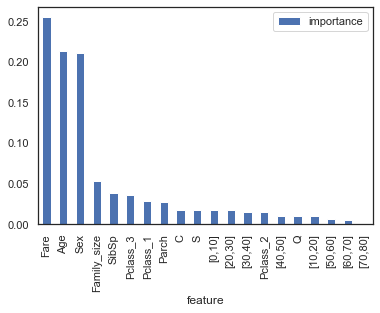

In [662]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=736)
random_forest = RandomForestClassifier()
random_forest.fit(X_train, Y_train)

importance = random_forest.feature_importances_
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances
print()
importances.plot.bar()

## 6 Confusion Matrix

#### The result is telling us that we have 195 + 116 correct predictions and 34 + 45 incorrect predictions

In [669]:


from sklearn.metrics import confusion_matrix

y_pred = random_forest.predict(X_test) # predicted Data
confusion_matrix = confusion_matrix(Y_test, y_pred) # Compare test and prediction variables
print(confusion_matrix) # print the metrix value


[[195  34]
 [ 45 116]]


In [671]:
# F-measure and support to print precision, recall, support and f1-score 

from sklearn.metrics import classification_report
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83       229
           1       0.77      0.72      0.75       161

    accuracy                           0.80       390
   macro avg       0.79      0.79      0.79       390
weighted avg       0.80      0.80      0.80       390



#### Interpretation : 
##### 1. Precision : Accuracy of poositive predictions
##### 2. Recall : It finds all positive instances anslo defines the ratio of true positives to the sum of true positives and false negatives.
##### 3. f1- score : calculates : 2*(Recall * Precision) / (Recall + Precision)